In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import io
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [3]:
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing import image
import keras.utils as image

In [4]:
len(os.listdir("/content/drive/MyDrive/Dataset1/train"))

39

In [5]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip = True, preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input )

In [6]:
train = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/Dataset1/train',
                                          target_size= (256,256),
                                          batch_size= 32)

val = val_datagen.flow_from_directory(directory= '/content/drive/MyDrive/Dataset1/test',
                                       target_size= (256,256),
                                          batch_size= 32)

Found 43030 images belonging to 39 classes.
Found 6167 images belonging to 39 classes.


Visualizing the data

In [7]:
t_img , label = train.next()

In [8]:
t_img.shape

(32, 256, 256, 3)

In [9]:
def plotImage(img_arr, label):
   for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()


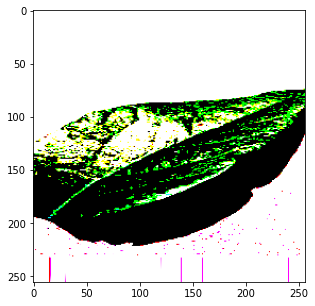

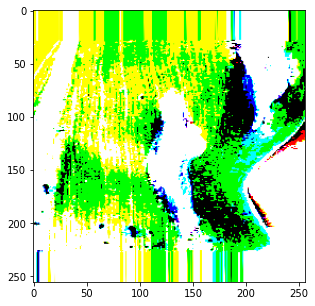

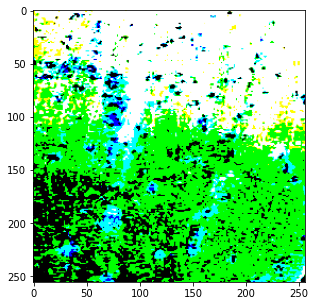

In [10]:
plotImage(t_img[:3], label[:3])


Building our model

In [11]:
from keras.layers import Dense, Flatten
from keras.models import Model

from keras.applications.vgg19 import VGG19
import keras

In [12]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)


80134624/80134624 [==============================] - 4s 0us/step


In [13]:
for layer in base_model.layers:
   layer.trainable = False


In [14]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
x = Flatten()(base_model.output)

x = Dense(units= 39, activation='softmax')(x)

#Creating our model
model = Model(base_model.input, x)


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
model.compile(optimizer='adam' , loss = keras.losses.categorical_crossentropy , metrics= ['accuracy'])

Early stopping and model checkpoint

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience=3, verbose=1)

mc = ModelCheckpoint(filepath= "best_accmodel.h5",
                     monitor = 'val_accuracy',
                     min_delta = 0.01,
                     patience = 3,
                     verbose= 1, 
                     save_best_only = True)

cb = [es, mc] 

In [ ]:
his = model.fit_generator(train ,
                          steps_per_epoch= 16,
                          epochs= 50,
                          verbose= 1,
                          callbacks= cb ,
                          validation_data= val,
                          validation_steps= 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 23.1270 - accuracy: 0.2754
Epoch 1: val_accuracy improved from -inf to 0.38086, saving model to best_accmodel.h5
16/16 [==============================] - 253s 15s/step - loss: 23.1270 - accuracy: 0.2754 - val_loss: 23.0023 - val_accuracy: 0.3809
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.0107 - accuracy: 0.4883
Epoch 2: val_accuracy improved from 0.38086 to 0.66016, saving model to best_accmodel.h5
16/16 [==============================] - 223s 14s/step - loss: 14.0107 - accuracy: 0.4883 - val_loss: 7.0710 - val_accuracy: 0.6602
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.2321 - accuracy: 0.5605
Epoch 3: val_accuracy did not improve from 0.66016
16/16 [==============================] - 222s 14s/step - loss: 10.2321 - accuracy: 0.5605 - val_loss: 9.0365 - val_accuracy: 0.6289
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 9.0719 - accuracy: 0.630

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

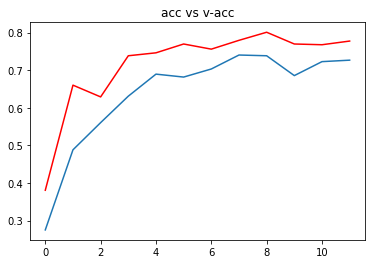

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

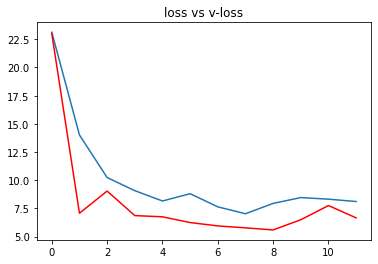

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [19]:
# load best model

from keras.models import load_model

model = load_model("/content/drive/MyDrive/best_accmodel.h5")


In [ ]:
acc = model.evaluate_generator(val)[1]

print (f"The accuracy of your model is = {acc*100} %")


In [20]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys()) ) ) 



here we have made the dictionary and zipped it from which we have been getting the prediction of disease and used it as a reference. refrence which will use the machine that which number belongs to which disease

1/1 [==============================] - 9s 9s/step
This Soybean leaf is healthy.


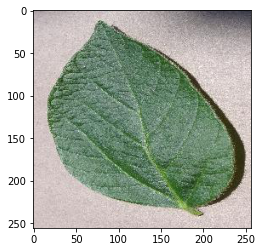

In [21]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, load_img

import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Load the pre-trained model and class label mapping
model = load_model('/content/drive/MyDrive/best_accmodel.h5')
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

def predict_leaf_status(image_path):
    # Load the image and preprocess it
    img = tf.keras.utils.load_img(image_path, target_size=(256, 256))
    x = tf.keras.utils.img_to_array(img)
    plt.imshow(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    

    # Use the pre-trained model to predict the class probabilities
    preds = model.predict(x)[0]
    
    
    # Get the index of the class with the highest probability
    pred_idx = np.argmax(preds)

    # Get the label of the predicted class using the ref dictionary
    pred_label = ref[pred_idx]

     # Extract the plant and disease labels from the predicted label
    parts = pred_label.split('___')
    plant = parts[0]
    disease = parts[1] if len(parts) > 1 else None

     # Return the predicted status and disease labels
    return ('healthy' if 'healthy' in pred_label.lower() else 'diseased', plant, disease)

    

image_path = '/content/drive/MyDrive/Dataset1/test/Soybean___healthy/image (1000).JPG'
status, plant, disease = predict_leaf_status(image_path)
if status == 'healthy':
    print(f'This {plant} leaf is {status}.')
else:
    print(f'This {plant} leaf is {status} with {disease} disease.')
 




saving the model

In [22]:
import tensorflow as tf

# Load your trained TensorFlow model
model = tf.keras.models.load_model('/content/drive/MyDrive/best_accmodel.h5')

# Convert your model to SavedModel format
tf.saved_model.save(model, '/content/drive/MyDrive/Dataset1')

in here the target_size and load_img has been depricated from keras.preprocessing from which we have been importing it instead of keras.preprocessing we used tf.utils as new module  